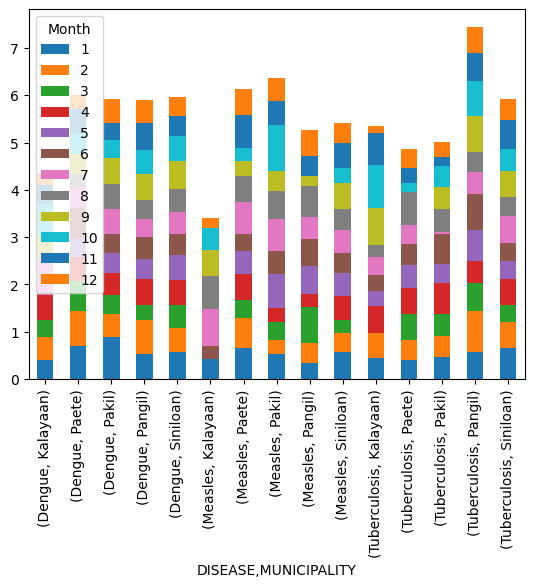

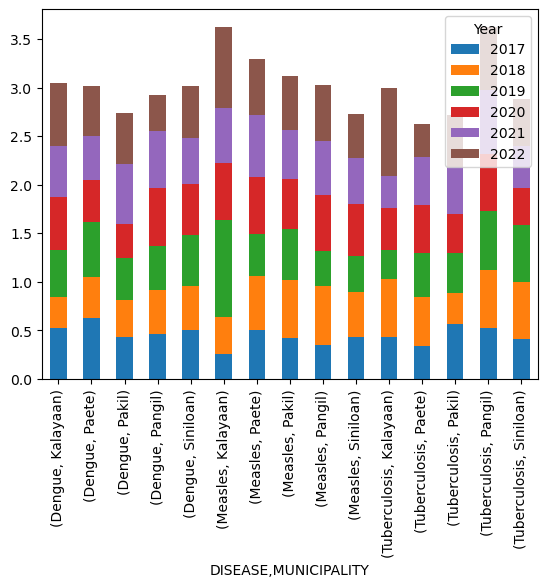

Accuracy: 0.2649800704673775


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data2.csv', encoding='ISO-8859-1')

# Preprocessing
# Convert 'Disease' and 'Location' columns to categorical variables
data['DISEASE'] = data['DISEASE'].astype('category')
data['MUNICIPALITY'] = data['MUNICIPALITY'].astype('category')

# Add new columns for month and year from the 'Date' column
data['Month'] = pd.DatetimeIndex(data['DATE']).month
data['Year'] = pd.DatetimeIndex(data['DATE']).year

# Scale the 'Number of Cases' column
scaler = MinMaxScaler()
data['NUMBER OF CASES'] = scaler.fit_transform(data[['NUMBER OF CASES']])

# Create a bar graph visualization of number of cases per location per month and per year by disease
data.groupby(['DISEASE','MUNICIPALITY', 'Month']).mean()['NUMBER OF CASES'].unstack().plot(kind='bar', stacked=True)
plt.show()
data.groupby(['DISEASE','MUNICIPALITY', 'Year']).mean()['NUMBER OF CASES'].unstack().plot(kind='bar', stacked=True)
plt.show()

# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

# Define the features and target
X_train = train_data[['DISEASE', 'MUNICIPALITY', 'Month', 'Year']]
y_train = train_data['NUMBER OF CASES']
X_test = test_data[['DISEASE', 'MUNICIPALITY', 'Month', 'Year']]
y_test = test_data['NUMBER OF CASES']

# One-hot encode the categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Create the random forest model
model = RandomForestRegressor(random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = mean_absolute_error(y_test, y_pred)
print('Accuracy:', accuracy)